In [2]:
# simulate degradation and restore the image using weiner filtering

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d, wiener

In [ ]:
img = cv2.imread('img-1.jpg') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imwrite('gray_image.jpg', gray)  

f = cv2.imread('gray_image.jpg', cv2.IMREAD_GRAYSCALE)
f = f.astype(np.float32) / 255.0  

In [ ]:

def motion_blur_kernel(size=15, angle=20):
    kernel = np.zeros((size, size))
    kernel[size // 2, :] = np.ones(size)
    rot_mat = cv2.getRotationMatrix2D((size / 2, size / 2), angle, 1)
    kernel = cv2.warpAffine(kernel, rot_mat, (size, size))
    return kernel / np.sum(kernel)

psf = motion_blur_kernel(size=15, angle=20)
blurred = convolve2d(f, psf, mode='same', boundary='wrap')

noise_std = 0.02
noisy = blurred + noise_std * np.random.normal(size=f.shape)
g = np.clip(noisy, 0, 1)

In [ ]:
def wiener_deconvolution(img, psf, K):
    # Fourier transforms
    G = np.fft.fft2(img)
    H = np.fft.fft2(psf, s=img.shape)
    H_conj = np.conj(H)
    # Wiener filter formula
    F_hat = (H_conj / (np.abs(H)**2 + K)) * G
    f_hat = np.fft.ifft2(F_hat)
    return np.abs(f_hat)

K = noise_std**2  # noise-to-signal ratio
restored = wiener_deconvolution(g, psf, K)


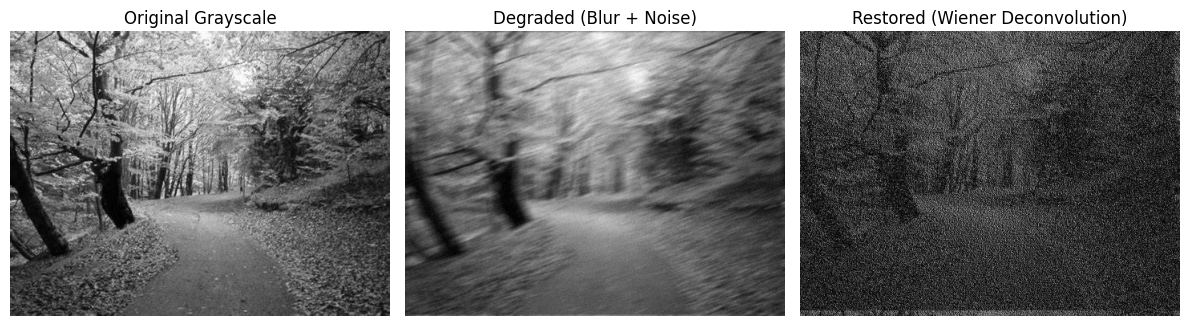

In [ ]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(f, cmap='gray')
plt.title('Original Grayscale')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(g, cmap='gray')
plt.title('Degraded (Blur + Noise)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(restored, cmap='gray')
plt.title('Restored (Wiener Deconvolution)')
plt.axis('off')

plt.tight_layout()
plt.show()